#  Eigen Faces  
<img src="https://blogs.elespectador.com/wp-content/uploads/2017/09/logo-Universidad-Nacional.png" 
     style="float: right; margin-right: 10px;" 
     width="120"
     />



<div style="text-align: left"> 
Valentina Orduz Bonilla <br>
Student of Mathematics <br>
Universidad Nacional de Colombia - Sede Bogotá <br>
</div>



In this notebook we are going to build an algorithm that learns a representation based on eigenfaces, following the steps below:

1. Select a suitable dataset for the construction of the representation.
2. Implement the eigenfaces algorithm.
3. Find out which are the eigenfaces that best explain one of your images.

# Import Libraries and Load Images

We start importing the necessary libreries, including the the Olivetti faces data-set from AT&T, that has 40 classes and 400 samples.  



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import cv2



Then, we define a function that plot the gallery of portraits.  

In [ ]:
"""Function that plot a gallery of portraits"""
def plot_gallery(images, h, w, titles=np.array([]), n_row=3, n_col=4):#titles
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles.shape[0] == n_row * n_col:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

On the dataset we find the images as vectors and as a matrix, so we take the vector representation as the train set.

In [ ]:
olivetti_faces = fetch_olivetti_faces()
X_train = olivetti_faces['data']

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Above we can see some of the pictures of the dataset. 

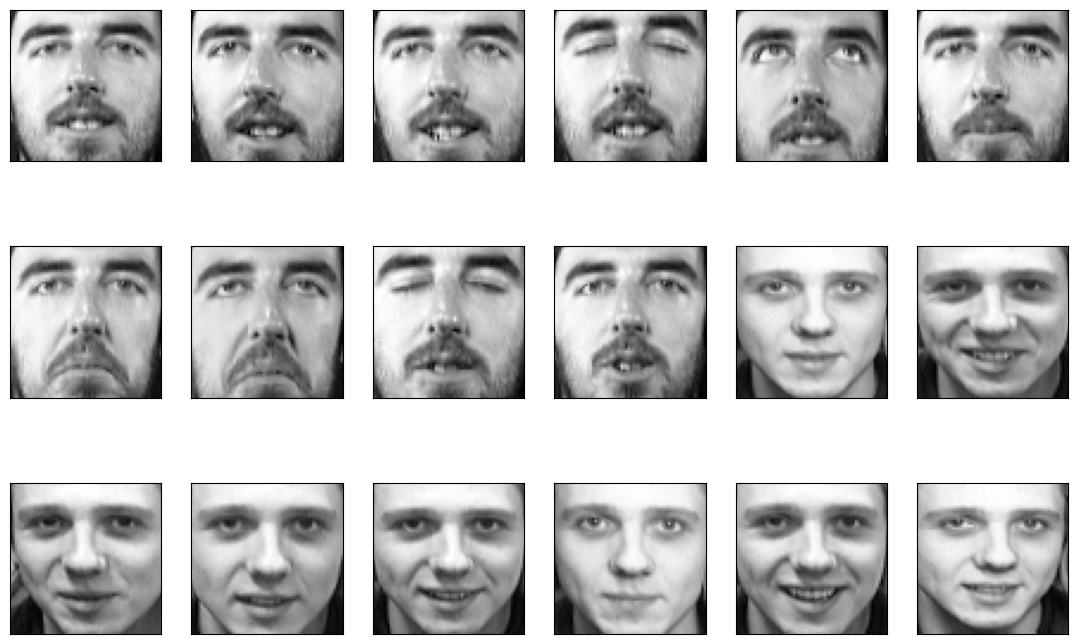

In [ ]:
plot_gallery(olivetti_faces['images'][100:118], h=64, w=64,n_row=3, n_col=6) #size of the images: 64x64

# Compute the Eigenfaces with PCA

Now, through Principal Component Analysis (PCA) we reduce the linear dimensionality, using Singular Value Decomposition of the data to project it to a lower dimensional space. In this case, we go from 400 to 150, which will be our eigenfaces.

In [ ]:
# Compute the eigenfaces on the face recognition dataset
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)


Extracting the top 150 eigenfaces from 400 faces


In [ ]:
eigenfaces = pca.components_.reshape((n_components, 64, 64))   #change the size of the images to 64x64
eigenfaces_vectors = pca.components_ 

Here we can see some of the eigenfaces we get. 

Eigenfaces


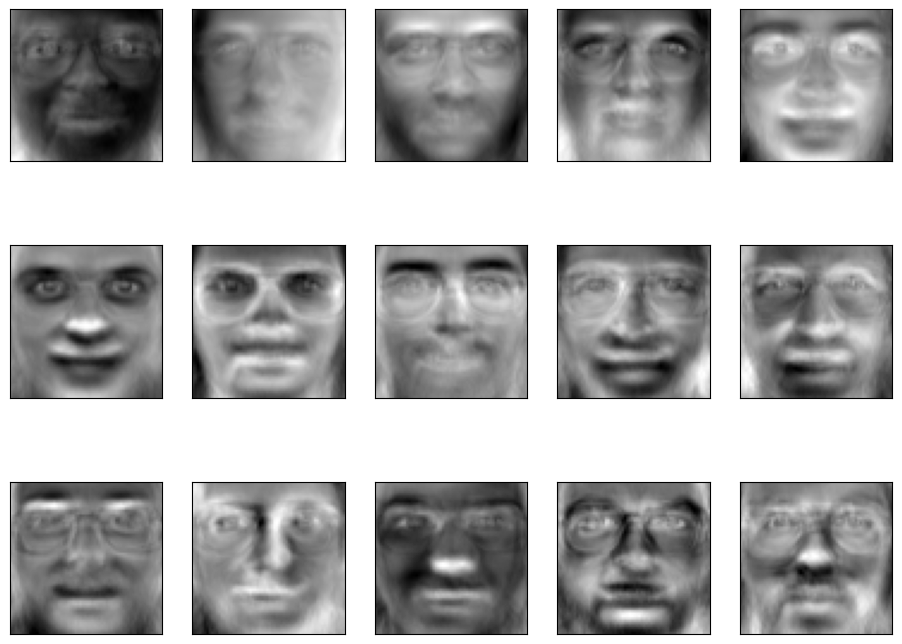

In [ ]:
print('Eigenfaces')
#plot_gallery(eigenfaces[100:118], h=64, w=64,n_row=3, n_col=6)
plot_gallery( eigenfaces, h=64, w=64,n_row=3, n_col=5)

# Compute my photo

Now, let's take a photo and see which are the eigenfaces that best explain the picture. 

In [ ]:
#Call the new image 
img = cv2.imread("eigenfaces_photo3.jpg", cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (64, 64))
img_resized = img_resized/img_resized.max()
img_resized_vector = img_resized.reshape(1,-1)[0]

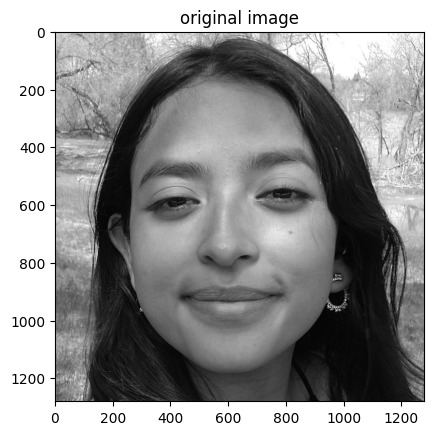

In [ ]:
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original image")
plt.show()

[]

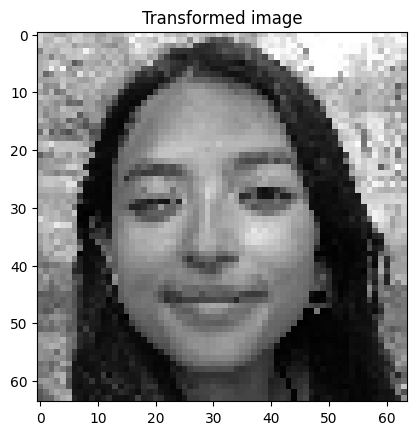

In [ ]:
plt.imshow(img_resized,cmap=plt.cm.gray)
plt.title("Transformed image")
plt.plot()

Finally, we use the dot product to measure similarity, in that way the highest absolute values of the dot products are the ones that best explain the image. 

In [ ]:
dot_product_list = []
for i in range(eigenfaces_vectors.shape[0]):
    dot_product_list.append([np.array([abs(np.dot(eigenfaces_vectors[i], img_resized_vector)), i])]) 
dot_product_list = np.array(dot_product_list)
dot_product_list = dot_product_list[:,0] 

In [ ]:
eigen_faces_similar_to_me = dot_product_list[dot_product_list[:,0].argsort()][::-1][:10]
index_eigenfaces = eigen_faces_similar_to_me[:,1].astype(int)

#We define the percentage of similarity as the dot product with the eigenface divided the sum of all the dot products
percentage_similarity = np.round_(eigen_faces_similar_to_me[:,0]/sum(eigen_faces_similar_to_me[:,0])*100,decimals=4)

All this process leads us to find the 10 eigenfaces that explain the photo better, with their percentages of similarity. 

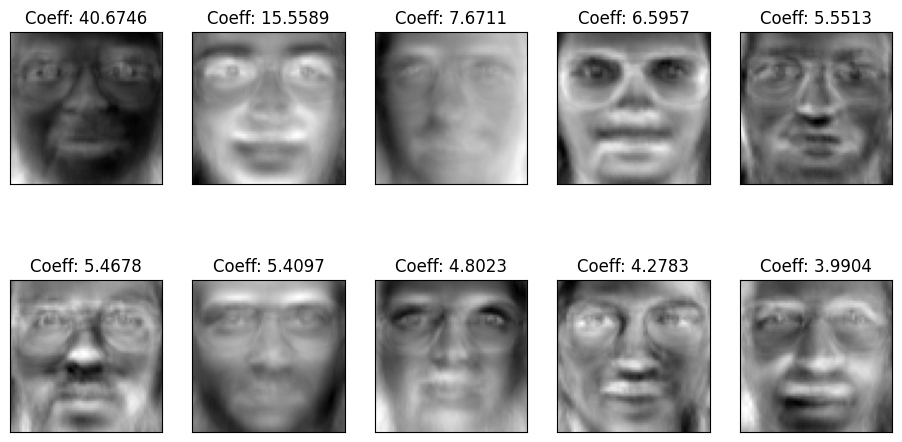

In [ ]:
plot_gallery(eigenfaces[index_eigenfaces], h=64, w=64,titles=np.array(["Coeff: "+x for x in percentage_similarity.astype(str)]),n_row=2, n_col=5)

#References

[1] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. <br>
[2] Scikit-learn. *sklearn.decomposition.PCA*. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html <br>
[3] Scikit-learn. *sklearn.datasets.fetch_olivetti_faces*. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn-datasets-fetch-olivetti-faces 

